In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.arange(0, 30, 1)
yerr = 0.2 * np.ones_like(x)

delta_m = 0.529e10
phi = 0.763
y = np.cos(delta_m * x * 1e-10 + phi)

np.random.seed(1)
data = y + yerr * np.random.randn(len(x))

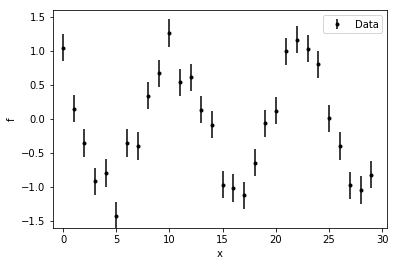

In [3]:
plt.errorbar(x, data, yerr=yerr, fmt='.k', label='Data')
plt.xlabel('x')
plt.ylabel('f')
plt.legend(frameon=True)
plt.ylim(-1.6, 1.6)
plt.xlim(-1, 30.5)
plt.show()

In [4]:
from george import GP, kernels

kernel = np.var(data) * kernels.ExpSine2Kernel(gamma=6, log_period=4.)
gp = GP(kernel)
gp.compute(x, yerr)

In [5]:
x_pred = np.arange(0, 30, 0.1)
print("Initial ln-likelihood: {0:.4f}".format(gp.log_likelihood(y)))

Initial ln-likelihood: -16.8468


In [6]:
from scipy.optimize import minimize

def neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.log_likelihood(y)

def grad_neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.grad_log_likelihood(y)

result = minimize(neg_ln_like, x0=gp.get_parameter_vector(), jac=grad_neg_ln_like, method='L-BFGS-B')
print(result)

      fun: 2.6533763614415538
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.32697915e-08, -2.35334810e-10,  1.24399295e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 456
      nit: 363
   status: 0
  success: True
        x: array([3.41613850e-02, 1.37409628e+05, 8.66531302e+00])


In [7]:
gp.set_parameter_vector(result.x)
print("\nFinal ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))
print(gp.get_parameter_dict())


Final ln-likelihood: -2.65
OrderedDict([('kernel:k1:log_constant', 0.034161384975794754), ('kernel:k2:gamma', 137409.62813938523), ('kernel:k2:log_period', 8.66531301859557)])


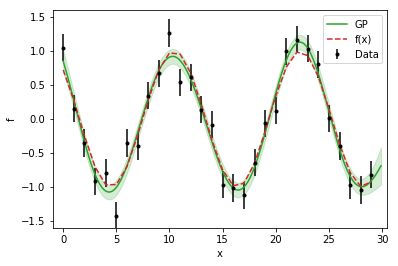

In [8]:
pred, pred_var = gp.predict(data, x_pred, return_var=True)

plt.plot(x_pred, pred, 'C2', label='GP')
plt.fill_between(x_pred, pred-np.sqrt(pred_var), pred+np.sqrt(pred_var), color='C2', alpha=.2)
plt.plot(x, y, '--C3', label='f(x)')
plt.errorbar(x, data, yerr=yerr, fmt='.k', label='Data')
plt.xlabel('x')
plt.ylabel('f')
plt.ylim(-1.6, 1.6)
plt.xlim(-1, 30.5)
plt.legend()
plt.show()